# Deep learning from scratch: homework 3

### General instructions

Complete the exercises listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.  

Included with the notebook are 

- a custom utilities file called `custom_utils.py` that provides various plotting functionalities (for unit tests to help you debug) as well as some other processing code


- datasets for exercises: `unnorm_linregress_data.csv`, `highdim_multirange_linregress.csv`, `student_debt.csv`, and  `noisy_sin_sample.csv`

be sure you have these files located in the same directory where you put this notebook to work!

### When submitting this homework:
    
**Make sure all output is present in your notebook prior to submission**

In [77]:
# import autograd functionality
import autograd.numpy as np
from autograd.misc.flatten import flatten_func
from autograd import grad as compute_grad   

# import custom utilities
import custom_utilities as util

# import various other libraries
import copy
import matplotlib.pyplot as plt

# this is needed to compensate for %matplotl+ib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# %matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Feel free to use the following ``gradient_descent`` function below for this exercise.

In [78]:
# gradient descent function
def gradient_descent(g,w,alpha,max_its,beta,version):    
    # flatten the input function, create gradient based on flat function
    g_flat, unflatten, w = flatten_func(g, w)
    grad = compute_grad(g_flat)

    # record history
    w_hist = []
    w_hist.append(unflatten(w))

    # start gradient descent loop
    z = np.zeros((np.shape(w)))      # momentum term
    
    # over the line
    for k in range(max_its):   
        # plug in value into func and derivative
        grad_eval = grad(w)
        grad_eval.shape = np.shape(w)

        ### normalized or unnormalized descent step? ###
        if version == 'normalized':
            grad_norm = np.linalg.norm(grad_eval)
            if grad_norm == 0:
                grad_norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
            grad_eval /= grad_norm
            
        # take descent step with momentum
        z = beta*z + grad_eval
        w = w - alpha*z

        # record weight update
        w_hist.append(unflatten(w))

    return w_hist

#### <span style="color:#a50e3e;">Exercise 2. </span>  Normalizing the input of a student debt dataset

The cell below loads in and visualizes a student debt dataset.  Here the input is in increments of time, and the output is the corresponding total amount of student debt held in the United States.

/Users/ikhlas/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


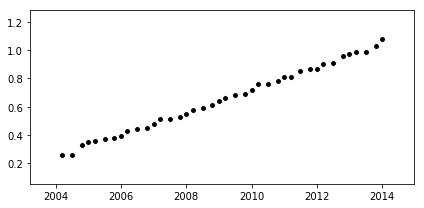

In [79]:
# load data
data = np.loadtxt('student_debt.csv',delimiter = ',')
x = data[:,:-1]
y = data[:,-1:]

# make copy of input and output (for later)
x_orig = copy.deepcopy(x)
y_orig = copy.deepcopy(y)

# plot everything
demo = util.Visualizer()
demo.plot_data_fit(x,y)

**TO DO**

Compare the performance of gradient descent in tuning the Least Squares cost function on this dataset when you use the raw dataset versus when you normalize the input.  Use only $25$ iterations of gradient descent in each instance, and in each instance use the largest steplength value $\alpha$ of the form $10^{-\gamma}$ (where $\gamma$ is a positive integer) that produces convergence.  Use an initial point $\mathbf{w}^0 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$.

**You should turn in:**
    
**1)** a contour plot in each instance with gradient descent path drawn on top (as shown in ``Exercise 1``


**2)** a cost function plot for each run of gradient descent



**3)** a short explanation summarizing what input normalization has done in this instance in terms of speeding up gradient descent

**Hint:**

Feel free to steal useful code chunks from the previous exercise!

/Users/ikhlas/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


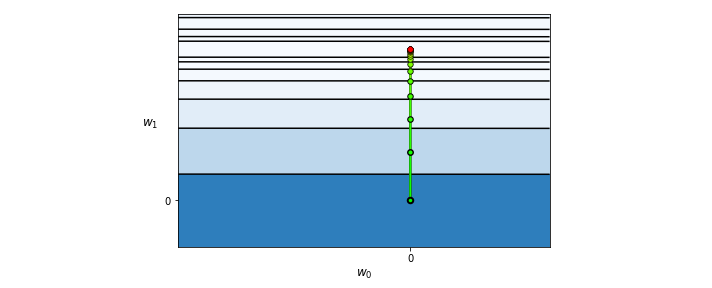

In [80]:
# make our predict function
def predict(x,w):
    return w[0] + x*w[1]

# least squares
least_squares = lambda w: np.sum((predict(x,w) - y)**2)

# run gradient descent initialized at 0
alpha = 10**(-9)
max_its = 25
w_init = np.zeros((2,1))

# run gradient descent
weight_history = gradient_descent(least_squares,
                                  w_init,
                                  alpha,
                                  max_its,
                                  beta = 0,
                                  version = 'unnormalized')

# plot history on contours
demo.draw_setup(least_squares,
                num_contours = 7,
                weight_history = weight_history,
                xmin = -.0005,
                xmax = .0003,
                ymin = -.0001,
                ymax = .0004)

/Users/ikhlas/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


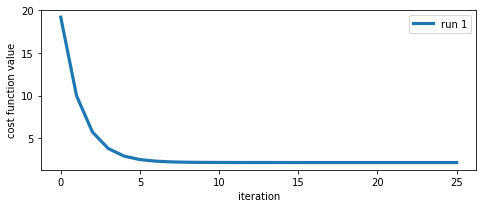

Minima of cost function: 2.1428126608250246


In [81]:
# plot cost function history
cost_history = [least_squares(v) for v in weight_history]
histories = [cost_history]
demo.compare_regression_histories(histories)
print("Minima of cost function: " + str(np.min(cost_history)))

/Users/ikhlas/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


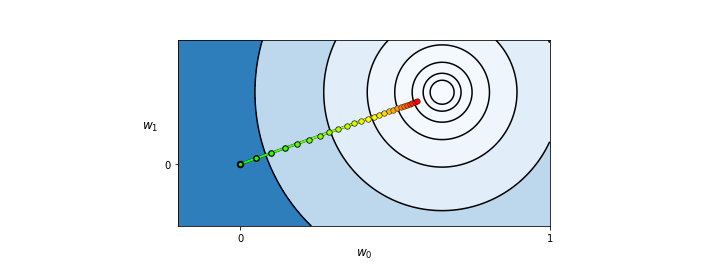

In [82]:
# compute the mean and standard deviation of the input
x_mean = np.mean(x)
x_std = np.std(x)

# a normalization function 
def normalize(data,data_mean,data_std):
    normalized_data = (data - data_mean)/data_std
    return normalized_data

# cache a copy of the original input, then normalize
x_orig = copy.deepcopy(x)
x = normalize(x,x_mean,x_std)

# run gradient descent initialized at 0
alpha = 10**(-3)
max_its = 25
w_init = np.zeros((2,1))

# run gradient descent
weight_history = gradient_descent(least_squares,
                                  w_init,
                                  alpha,
                                  max_its,
                                  beta = 0,
                                  version = 'unnormalized')

# # show contour plot
# demo.draw_setup(least_squares,num_contours = 7,
#                 xmin = -1,
#                 xmax = 10,
#                 ymin = -1,
#                 ymax = 7)

# plot history on contours
demo.draw_setup(least_squares,
                num_contours = 7,
                weight_history = weight_history,
                xmin = -.2,
                xmax = 1,
                ymin = -.2,
                ymax = .4)


Summary of what input normalization has done w.r.t. speeding up gradient descent:

We can see that the contours have changed from horizontally long, and narrow-shaped to circular. Without normalization, it wouldn't change very much, but cost has dramatically decreased per iteration. As w1 (slope) and w0 (bias) are treated with more equivalence, more uniform gradient descent steps are taken. As we're looking for the lowest value on the loss function surface (minima), we choose to move away from looking at long, narrow-shaped 'valleys'.